## 수업 목표 : RNAseq 데이터를 관찰하고 원하는 유전자 데이터를 수집할 수 있다. 

RNAseq 은 주로 Illumina 라는 기계를 통해 유전자들의 발현값을 관찰하는 방법을 말함. 

![](https://image.slidesharecdn.com/20101210ngscourse-101208080158-phpapp01/95/20110114-next-generation-sequencing-course-65-728.jpg?cb=1303919918)

In [1]:
# basic numpy grammars

In [2]:
import numpy as np

In [6]:
np.zeros((4,5)) # 행이 4개, 열이 5개인 0으로 가득찬 matrix를 만들어준다. 

array([[ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.]])

In [7]:
a = np.zeros((4,5))

In [23]:
a[2:4,3:5] = 1
a[0:2,0:3] = 2

In [24]:
a

array([[ 2.,  2.,  2.,  0.,  0.],
       [ 2.,  2.,  2.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  1.],
       [ 0.,  0.,  0.,  1.,  1.]])

In [25]:
a[1:3,1:4]

array([[ 2.,  2.,  0.],
       [ 0.,  0.,  1.]])

In [26]:
m = a  > 1

In [27]:
m

array([[ True,  True,  True, False, False],
       [ True,  True,  True, False, False],
       [False, False, False, False, False],
       [False, False, False, False, False]], dtype=bool)

In [28]:
a[m]

array([ 2.,  2.,  2.,  2.,  2.,  2.])

In [35]:
# 행으로 마스킹 
m = a[:,0] > 1
a[m]

array([[ 2.,  2.,  2.,  0.,  0.],
       [ 2.,  2.,  2.,  0.,  0.]])

In [36]:
a[m,:] # 이렇게 하는게 옳지만 편의를 위해서 위에 문법을 허용. 저렇게 사용하는 사람이 많아서 그렇다고 이해 

array([[ 2.,  2.,  2.,  0.,  0.],
       [ 2.,  2.,  2.,  0.,  0.]])

In [32]:
# 열로 마스킹 
m = a[0,:] > 1
a[m] # 열로 마스킹은 잘 안하니까 편의 허용을 안함. 헷갈리기도하고 

IndexError: boolean index did not match indexed array along dimension 0; dimension is 4 but corresponding boolean dimension is 5

In [33]:
a[:,m] # 다 써주면 잘작동함. 

array([[ 2.,  2.,  2.],
       [ 2.,  2.,  2.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

In [48]:
# indexing 
ir = [1,1,2]
ic = [1,1,2]

In [49]:
a

array([[ 2.,  2.,  2.,  0.,  0.],
       [ 2.,  2.,  2.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  1.],
       [ 0.,  0.,  0.,  1.,  1.]])

In [50]:
a[ir,:]

array([[ 2.,  2.,  2.,  0.,  0.],
       [ 2.,  2.,  2.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  1.]])

In [51]:
a[:,ic]

array([[ 2.,  2.,  2.],
       [ 2.,  2.,  2.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

In [52]:
a[ir,ic] # (1,1), (1,1) (2,2) 반환 

array([ 2.,  2.,  0.])

In [53]:
# broad casting 
a * 2

array([[ 4.,  4.,  4.,  0.,  0.],
       [ 4.,  4.,  4.,  0.,  0.],
       [ 0.,  0.,  0.,  2.,  2.],
       [ 0.,  0.,  0.,  2.,  2.]])

In [54]:
a / 2

array([[ 1. ,  1. ,  1. ,  0. ,  0. ],
       [ 1. ,  1. ,  1. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. ,  0.5,  0.5],
       [ 0. ,  0. ,  0. ,  0.5,  0.5]])

In [55]:
np.mean(a) # 전체 평균 

0.80000000000000004

In [56]:
np.mean(a,axis=0) # 열 평균 

array([ 1. ,  1. ,  1. ,  0.5,  0.5])

In [57]:
np.mean(a,axis=1) # 행평균 

array([ 1.2,  1.2,  0.4,  0.4])

In [58]:
np.std(a) # 전체 표준편차

0.87177978870813466

In [60]:
np.std(a,axis=0) # 열 표준편차 

array([ 1. ,  1. ,  1. ,  0.5,  0.5])

In [61]:
np.std(a,axis=1) # 행 표준편차

array([ 0.9797959 ,  0.9797959 ,  0.48989795,  0.48989795])

In [1]:
%matplotlib inline
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('./file_RNAseq/RNAseq_result.xlsx')

In [3]:
df.head(10) 

,target_id,WT1,WT2,WT3,Treat1,Treat2,Treat3,Treat4,Treat5,Treat6
0,ENSMUST00000177564.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ENSMUST00000196221.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,ENSMUST00000179664.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ENSMUST00000178537.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,ENSMUST00000178862.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,ENSMUST00000179520.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,ENSMUST00000179883.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,ENSMUST00000195858.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,ENSMUST00000179932.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,ENSMUST00000180001.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
df.shape 

(109282, 10)

* 총 11만개에 가까운 mRNA 발현값을 관찰할 수 있었다. 
* **각 mRNA가 각 sample에 따라 어떤 발현을 보이는지 한눈에 볼 수 있도록 시각화를 해보자 **

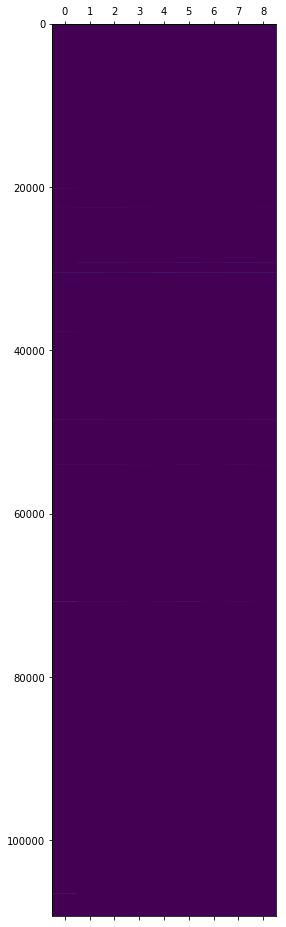

In [5]:
matrix = df.values[:,1:].astype(float)
plt.figure(figsize=(100,100))
plt.matshow(matrix,aspect='auto')
plt.show()

* 표에나오는 모든 유전자들의 발현값을 보고싶어서 matshow를 했는데 온통 파란색만 나온다. 
* 그 이유는 각 유전자들의 maximum 발현값이 서로다르기 때문이고 maximum 발현값이 지나치게 높은 유전자 때문에 색깔이 적절히 할당이 되지 않기 때문이다. 
* 따라서 각 유전자의 발현값을 해당 유전자의 발현값 분포에 맞추어 보정을 해줘야함
* 각 유전자의 발현값을 [z-score](https://ko.wikipedia.org/wiki/%ED%91%9C%EC%A4%80_%EC%A0%90%EC%88%98) 로 변형시켜보자
![](https://wikimedia.org/api/rest_v1/media/math/render/svg/e61469e99c0c981d3f5813693366f17f9710dead)

In [6]:
matrix

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [7]:
row_mean = np.mean(matrix,axis=1)
row_std  = np.std(matrix,axis=1)

/home/k821209/miniconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in divide
  if __name__ == '__main__':


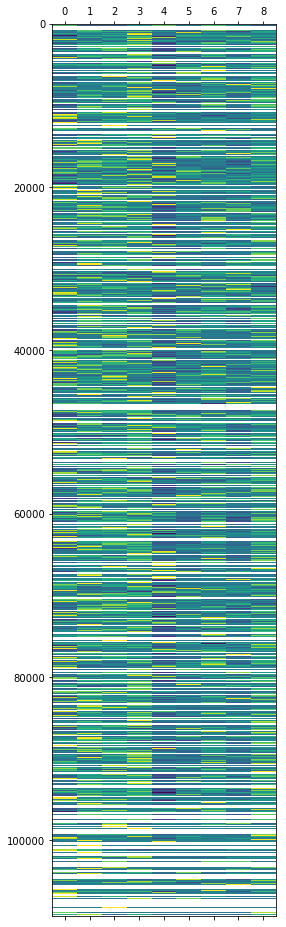

In [8]:
modified_matrix = ((matrix.T - row_mean)/row_std).T
plt.figure(figsize=(100,100))
plt.matshow(modified_matrix,aspect='auto')
plt.show()

/home/k821209/miniconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in divide
  if __name__ == '__main__':


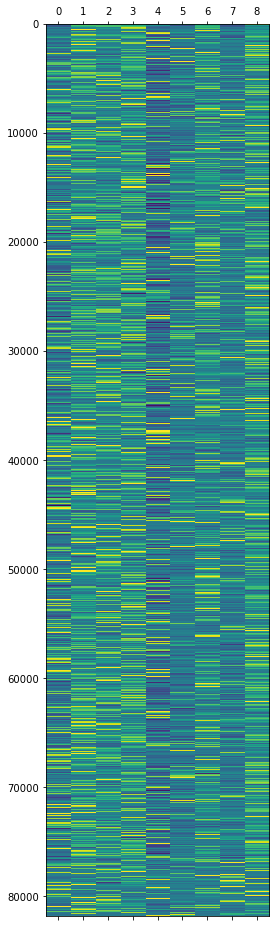

In [175]:
modified_matrix = ((matrix.T - row_mean)/row_std).T
m = ~np.isnan(modified_matrix[:,0])
modified_matrix_nonan = modified_matrix[m]
plt.figure(figsize=(100,100))
plt.matshow(modified_matrix_nonan,aspect='auto')
plt.show()

* 총 몇개의 유전자 발현 값을 그릴 수 있었는가?

In [177]:
modified_matrix_nonan.shape,modified_matrix.shape

((81845, 9), (109282, 9))

* 총 81845 개의 유전자 발현 값을 그릴 수 있었다.

---

* 각각의 수치는 해당 유전자의 발현 값을 나타낸다. transcript expression 
* WT은 일반 쥐의 세포 
* Treat은 형질전환을 통해 특정 유전자의 발현을 억제한 세포이다. 
* 정상세포의 유전자 발현, 형질전환된 세포의 유전자 발현값을 찾아보자. 
* 정상세포의 경우는 3번의 관찰이 있고 형질전환된 세포의 경우 총 6번의 관찰이 있다. 
* **정상세포 각 유전자의 평균 발현 값, 형질전환된 세포 각 유전자의 평균 발현 값을 계산해보자** 

In [11]:
df['WT_mean'] = df.apply(lambda x : np.mean([x['WT1'],x['WT2'],x['WT3']]),axis = 1)

In [12]:
df['TT_mean'] = df.apply(lambda x : np.mean([x['Treat1'],x['Treat2'],x['Treat3'],x['Treat4'],x['Treat5'],x['Treat6']]),axis = 1)

In [13]:
df.head()

,target_id,WT1,WT2,WT3,Treat1,Treat2,Treat3,Treat4,Treat5,Treat6,WT_mean,TT_mean
0,ENSMUST00000177564.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ENSMUST00000196221.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,ENSMUST00000179664.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ENSMUST00000178537.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,ENSMUST00000178862.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
# WT의 평균 발현값과 Treat의 평균 발현값의 차이를 구하기 위해 나누어 보자 
fc = df.WT_mean.values / df.TT_mean.values

/home/k821209/miniconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in divide
  from ipykernel import kernelapp as app
/home/k821209/miniconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in divide
  from ipykernel import kernelapp as app


In [168]:
# 나누어진 값들중 분모가 0이라서 nan 및 inf가 된 값들을 제거해보자. 
mrnas = df.target_id
m     = ~np.isnan(fc)
m1    = ~np.isinf(fc)
m2    = ~(fc == 0)
fc_nonan = fc[m&m1&m2]
mrnas_nonan = mrnas[m&m1&m2]

In [169]:
fc_nonan.shape

(68348,)

In [170]:
# 제거된 목록에서 WT에서 Treat보다 10배 이상 발현하는 유전자들을 찾자. 
m = (fc_nonan > 10)
fc_nonan_wt_high    = fc_nonan[m]
mrnas_nonan_wt_high = mrnas_nonan[m]

In [171]:
len(mrnas_nonan_wt_high)

1341

* 총 1341개의 유전자들이 평균적으로 WT에서 Treat보다 10배 이상 발현하고 있다.  

 

In [172]:
m = np.array([True if x in set(mrnas_nonan_wt_high) else False for x in df.target_id])

In [173]:
highfc_mat = modified_matrix[m]

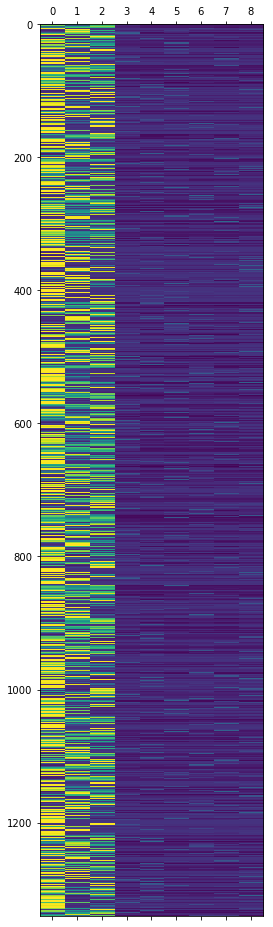

In [174]:
plt.figure(figsize=(100,100))
plt.matshow(highfc_mat,aspect='auto')
plt.show()

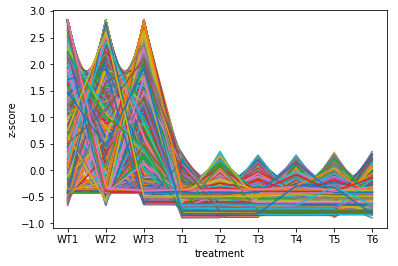

In [191]:
plt.plot(highfc_mat.T)
plt.xticks(range(0,9),['WT1','WT2','WT3','T1','T2','T3','T4','T5','T6'])
plt.xlabel('treatment')
plt.ylabel('z-score')
plt.show()

* 실습 : modified_matrix 값에서 WT 의 standard deviation, Treat의 standard deviation 이 0.5보다 작은 유전자만 가져와서 heatmap을 그려보자

In [82]:
# 무슨 유전자들이 저렇게 발현하는지 봐야한다. 
df_annotation = pd.read_csv('./file_RNAseq/mouse_genes_GRCm38.p5_transcript_version.txt',sep='\t')

In [83]:
df_annotation.head()

,Gene stable ID,Transcript stable ID,Gene name,Gene description,Transcript stable ID version
0,ENSMUSG00000064372,ENSMUST00000082423,mt-Tp,mitochondrially encoded tRNA proline [Source:M...,ENSMUST00000082423.1
1,ENSMUSG00000064371,ENSMUST00000082422,mt-Tt,mitochondrially encoded tRNA threonine [Source...,ENSMUST00000082422.1
2,ENSMUSG00000064370,ENSMUST00000082421,mt-Cytb,mitochondrially encoded cytochrome b [Source:M...,ENSMUST00000082421.1
3,ENSMUSG00000064369,ENSMUST00000082420,mt-Te,mitochondrially encoded tRNA glutamic acid [So...,ENSMUST00000082420.1
4,ENSMUSG00000064368,ENSMUST00000082419,mt-Nd6,mitochondrially encoded NADH dehydrogenase 6 [...,ENSMUST00000082419.1


In [34]:
mrnas_nonan_wt_high.shape

(1341,)

In [84]:
df_annotation_ix = df_annotation.set_index('Transcript stable ID version')

In [88]:
df_annot_sub = df_annotation_ix.loc[mrnas_nonan_wt_high]
#.dropna().to_excel('DEG_downregulation.xls')

In [91]:
df_annot_sub.head()

,Gene stable ID,Transcript stable ID,Gene name,Gene description
Transcript stable ID version,,,,
ENSMUST00000166442.2,ENSMUSG00000079491,ENSMUST00000166442,H2-T10,"histocompatibility 2, T region locus 10 [Sourc..."
ENSMUST00000188251.6,ENSMUSG00000023341,ENSMUST00000188251,Mx2,MX dynamin-like GTPase 2 [Source:MGI Symbol;Ac...
ENSMUST00000190097.1,ENSMUSG00000023341,ENSMUST00000190097,Mx2,MX dynamin-like GTPase 2 [Source:MGI Symbol;Ac...
ENSMUST00000122808.1,ENSMUSG00000060183,ENSMUST00000122808,Cxcl11,chemokine (C-X-C motif) ligand 11 [Source:MGI ...
ENSMUST00000077820.5,ENSMUSG00000060183,ENSMUST00000077820,Cxcl11,chemokine (C-X-C motif) ligand 11 [Source:MGI ...


In [96]:
m = df_annotation_ix.index == 'ENSMUST00000103099.7'
df_annotation_ix[m]

,Gene stable ID,Transcript stable ID,Gene name,Gene description
Transcript stable ID version,,,,
ENSMUST00000103099.7,ENSMUSG00000017119,ENSMUST00000103099,Nbr1,neighbor of Brca1 gene 1 [Source:MGI Symbol;Ac...


In [95]:
m = df['target_id'] == 'ENSMUST00000103099.7'
df[m]

,target_id,WT1,WT2,WT3,Treat1,Treat2,Treat3,Treat4,Treat5,Treat6,WT_mean,TT_mean
53126,ENSMUST00000103099.7,5.68165,1.63684,4.07306,0.687756,0.0,0.26085,1.06151,0.124626,0.339672,3.797183,0.412402
